In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.sparse import csr_matrix

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("./data_ml_100k/u.data", sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
items = pd.read_csv("./data_ml_100k/u.item", sep='|', encoding="latin-1", header=None)
items.columns = ['item_id', 'movie_title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items.head()

,item_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
movie_id_titles = items[["item_id", "movie_title"]]
movie_id_titles.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, movie_id_titles, on="item_id")
df.to_csv("movies.csv", index=False)
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
df_movies = pd.read_csv("movies.csv")
df_movies.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [9]:
df_movies.isnull().sum()

user_id        0
item_id        0
rating         0
timestamp      0
movie_title    0
dtype: int64

In [10]:
df_movies.dtypes

user_id         int64
item_id         int64
rating          int64
timestamp       int64
movie_title    object
dtype: object

In [11]:
unique_movies = df_movies["movie_title"].unique().shape[0]
unique_users = df_movies["user_id"].unique().shape[0]
print(f"There are {unique_movies} unique movies rated by {unique_users} different users in the dataset")

There are 1664 unique movies rated by 943 different users in the dataset


In [12]:
df_movies.shape

(100000, 5)

In [13]:
movie_user = df_movies.groupby("user_id")["item_id"].count()
movie_user.head()

user_id
1    272
2     62
3     54
4     24
5    175
Name: item_id, dtype: int64

<Figure size 1600x800 with 0 Axes>

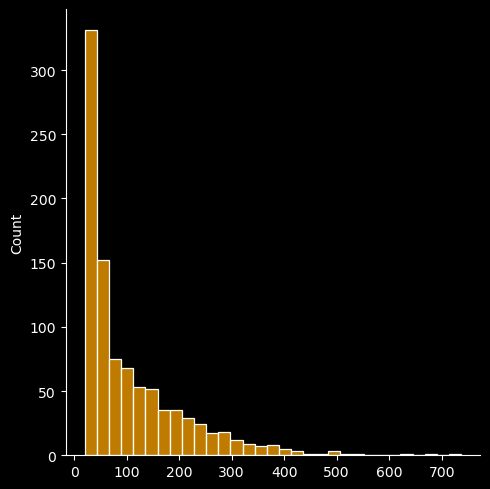

In [14]:
plt.figure(figsize=(16, 8))
sns.displot(movie_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [15]:
print(f"A user rates to an average of {np.median(movie_user)} movies, with minimum {np.min(movie_user)} and maximum {np.max(movie_user)} movies")

A user rates to an average of 65.0 movies, with minimum 20 and maximum 737 movies


In [23]:
# build the user-movie matrix
# convert the dataframe into a pivot table
df_user_movie = df_movies.pivot(index="item_id", columns="user_id", values="rating").fillna(0)

# obtain a sparse matrix
mat_user_movie = csr_matrix(df_user_movie.values)

In [24]:
df_user_movie.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# map movie_id (item_id) to movie_title
df_unique_movies = df_movies.drop_duplicates(subset=['item_id']).reset_index(drop=True)[['item_id', 'movie_title']]
df_unique_movies.head()

,item_id,movie_title
0,242,Kolya (1996)
1,302,L.A. Confidential (1997)
2,377,Heavyweights (1994)
3,51,Legends of the Fall (1994)
4,346,Jackie Brown (1997)


In [26]:
decode_id_movie = {
    movie:_id for _id, movie in df_unique_movies.values.tolist()
}

In [27]:
import recommender
model = recommender.Recommender(metric='cosine', algorithm='brute', k=20, data=mat_user_movie, decode_id_movie=decode_id_movie)

In [28]:
movie = "Kolya (1996)"

In [29]:
new_recommendations = model.make_recommendation(new_movie=movie, n_recommendations=10)

Starting the recommendation process for Kolya (1996) with id of 242...
... Done


In [39]:
print(f"The recommendations for {movie} are:")
print("\n".join(new_recommendations))

The recommendations for Kolya (1996) are:
Marvin's Room (1996)
Hoodlum (1997)
Fire on the Mountain (1996)
Benny & Joon (1993)
Contact (1997)
Mother (1996)
Perfect World, A (1993)
Donnie Brasco (1997)
Murder at 1600 (1997)
Underworld (1997)
